# 4.10 Coding Etiquette and Excel Reporting

## Final Report

## Table of Contents

### Importing Libraries & Dataframes

## 4.10 Questions Part I

### Question 1 - Importing Data

### Question 2 - Security Issues

### Question 3a - Separating by Region

### Question 3b - Determining a Difference by Region

### Question 4 - Creating an Exclusion flag for low-activity customers

### Question 5 - Creating Profiles based on certain criterion

#### 5a. Age Profile

#### 5b. Income Profile

#### 5c. Diet Profile

#### 5d. Pet Profile

#### 5e. Family Profile

### Question 6 - Visualizations for the Profiles

### Question 7 - Aggregation for the Profiles

### Question 8 - Compare Profiles to Regions and Departments

### Question 9 - Suitable charts to illustrate the results

### Supplementary Observations

## Importing Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframes

In [2]:
#Pathway to the Dataframes
path = r'C:\Users\Dallas\Desktop\Data Analyst - Projects\Data Immersion\Data Immersion A4\04-2023 Instacart Basket Analysis'

In [3]:
#Importing orders_products_merged_grouping.pkl dataframe
df_combined_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

## 4.10 Questions Part 1

### Question 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column

In [4]:
#See Importing Dataframes Section above.  Checking here to ensure that it is correct
df_combined_final.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_freq', 'order_freq_flag',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [5]:
#Checking to ensure size is correct
df_combined_final.shape

(32404859, 33)

In [6]:
#Checking for empty or missing values
df_combined_final.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
order_day_of_week               0
order_hour_of_day               0
days_since_prior_order    2076096
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
_merge                          0
price_range_loc                 0
busiest_day                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
average_price                   0
spending_flag                   0
median_freq                     5
order_freq_flag                 5
First Name                      0
Last Name                       0
Gender                          0
State                           0
Age                             0
date_joined   

In [7]:
#Creating a dataframe that includes the null values
df_nan = df_combined_final[df_combined_final['order_freq_flag'].isnull() == True]

In [8]:
#Examining dataframe with null values
df_nan[['user_id', 'order_number','order_freq_flag', 'median_freq', 'days_since_prior_order']]

,user_id,order_number,order_freq_flag,median_freq,days_since_prior_order
32377906,159838,1,NaN,NaN,NaN
32377907,159838,1,NaN,NaN,NaN
32377908,159838,1,NaN,NaN,NaN
32377909,159838,1,NaN,NaN,NaN
32377910,159838,1,NaN,NaN,NaN


In [9]:
#days_since_prior_order is Null so customer only has the one order; Freq_flag should be 'non-frequent' and median should be 1
df_combined_final.fillna({'order_freq_flag':'Non-Frequent customer', 'median_freq': 1}, inplace=True)

In [10]:
#Re-checking null values
df_combined_final.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
order_day_of_week               0
order_hour_of_day               0
days_since_prior_order    2076096
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
_merge                          0
price_range_loc                 0
busiest_day                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
average_price                   0
spending_flag                   0
median_freq                     0
order_freq_flag                 0
First Name                      0
Last Name                       0
Gender                          0
State                           0
Age                             0
date_joined   

### Question 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

### Observations: First Name, Last Name, Age, Gender, Number of Dependants, Family Status, Income and State could all be considered PII.  If we don't include First and Last names, this would alleviate the issue because the remaining information would have no connection to an individual person.  We would need the remaining information for analysis purposes as well.

In [11]:
#Create a new dataframe with first and last names dropped
df_final = df_combined_final.drop(columns = ['First Name', 'Last Name'])

In [12]:
#Extend the display to show all department columns
pd.options.display.max_columns = None

In [13]:
#checking to make sure it's still the same information without names
df_final.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_freq,order_freq_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [14]:
#Checking the size to make sure only two columns were deleted
df_final.shape

(32404859, 31)

In [15]:
#Checking the remaining column names
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_freq', 'order_freq_flag',
       'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income'],
      dtype='object')

### Question 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set

### 3a. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [16]:
#Checking to see how the names of the states are spelled and to see the frequency
df_final['State'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [17]:
#Checking Count in the dataframe for State to ensure it matches the size of the dataframe
df_final['State'].shape

(32404859,)

In [18]:
#Creating a Region column empty list
Region = []

In [19]:
#Creating a for-loop to fill the region list based on the state
for value in df_final['State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        Region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        Region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        Region.append('South')
    else:
        Region.append('West')

In [20]:
#Printing the list
Region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [21]:
#Putting the list results into the column in the dataframe
df_final['Region'] = Region

In [22]:
#Checking the dataframe with the new list
df_final.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_freq,order_freq_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [23]:
#Checking the number of columns with the new addition
df_final.shape

(32404859, 32)

In [24]:
#Checking the frequency of each region
df_final['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

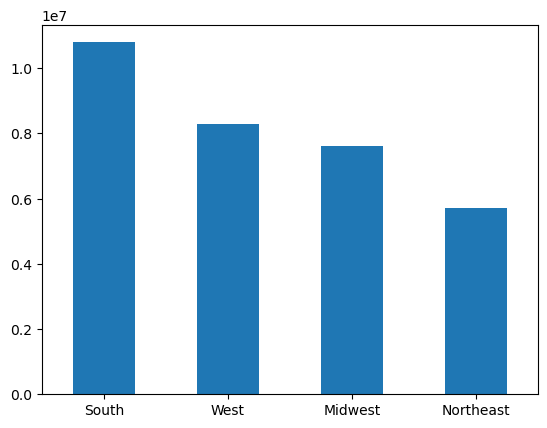

In [25]:
#Creating a bar chart to represent the frequency of the regions
df_Region_bar = df_final['Region'].value_counts().plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [26]:
#Exporting the frequency bar chart of the regions
df_Region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_region_bar.png'))

### 3b. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [27]:
#Creating a crosstab between Region and Spending Flag to view the spending habits
crosstab_region = pd.crosstab(df_final['spending_flag'], df_final['Region'], dropna = False)

In [28]:
crosstab_region

Region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,29265,18642,40564,31223
Low Spender,7568060,5704094,10751321,8261690


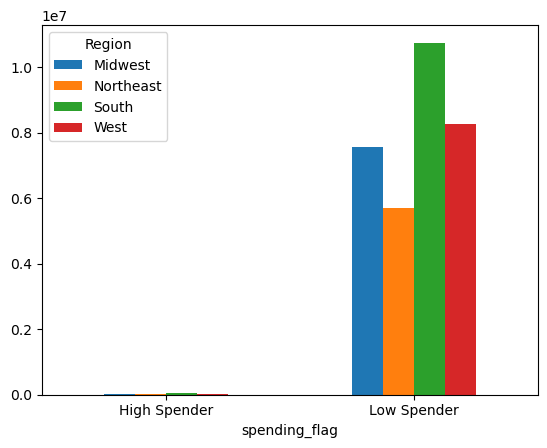

In [29]:
#Bar Chart to show variations between low and high spenders by region
df_final_bar = crosstab_region.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [30]:
#Creating a crosstab between Region and Spending Flag transposed from the first
crosstab_region_2 = pd.crosstab(df_final['Region'], df_final['spending_flag'], dropna = False)

In [31]:
crosstab_region_2

spending_flag,High Spender,Low Spender
Region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


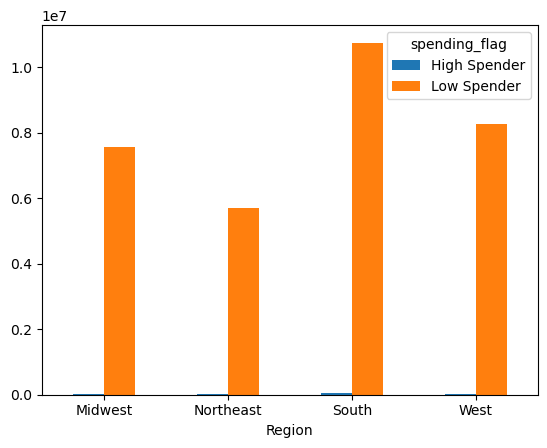

In [32]:
#Bar Chart to show variations between Regions for low and high spenders
df_final_bar_2 = crosstab_region_2.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [33]:
#Exporting Bar Chart 1
df_final_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_region_spending_bar_1.png'))

In [34]:
#Exporting Bar Chart 2
df_final_bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_region_spending_bar_2.png'))

### Question 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [35]:
#Creating an exclusion flag
df_final.loc[df_final['max_order'] < 5, 'Order_flag'] = 'Low-Activity Customer'

In [36]:
df_final.loc[df_final['max_order'] >= 5, 'Order_flag'] = 'High-Activity Customer'

In [37]:
#Checking the new column
df_final.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_freq,order_freq_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,Order_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity Customer


In [38]:
#Creating a subset dataframe excluding the low-Activity Customers
df_final_high = df_final[df_final['Order_flag'] == 'High-Activity Customer']

In [39]:
#Exporting the subset dataframe
df_final_high.to_pickle(os.path.join(path,'02 Data','Prepared Data','final_high_activity_only.pkl'))

In [40]:
#Checking the size of the dataframe excluding low-activity customers
df_final_high.shape

(30964564, 33)

### Question 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

### 5a. Age Profile

In [41]:
#Creating an Age Profile
df_final_high.loc[df_final_high['Age'] < 20, 'Age_Profile'] = 'Teenager'

C:\Users\Dallas\AppData\Local\Temp\ipykernel_1804\1625431494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high.loc[df_final_high['Age'] < 20, 'Age_Profile'] = 'Teenager'


In [42]:
df_final_high.loc[(df_final_high['Age'] >= 20) & (df_final_high['Age'] <= 35), 'Age_Profile'] = 'Young Adult'

In [43]:
df_final_high.loc[(df_final_high['Age'] > 35) & (df_final_high['Age'] < 65), 'Age_Profile'] = 'Middle-Aged Adult'

In [44]:
df_final_high.loc[df_final_high['Age'] >= 65, 'Age_Profile'] = 'Senior'

In [45]:
#Frequency of ge Profile
df_final_high['Age_Profile'].value_counts(dropna = False)

Middle-Aged Adult    14030215
Senior                8195544
Young Adult           7764271
Teenager               974534
Name: Age_Profile, dtype: int64

In [46]:
#Descriptive Stats of Age; Used to ensure number of bins was 64 between min/max values of 18-81
df_final_high['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

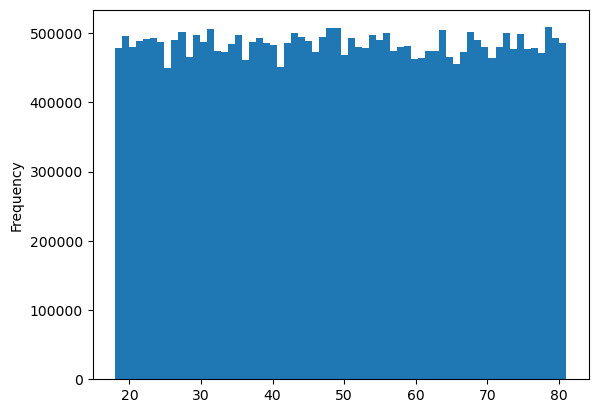

In [47]:
#Histogram of Age Frequency
df_final_high['Age'].plot.hist(bins = 64)

### 5b. Income Profile

In [48]:
#Descriptive Stats of Income to find min/max values and interquartile range
df_final_high['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

<Axes: ylabel='Frequency'>

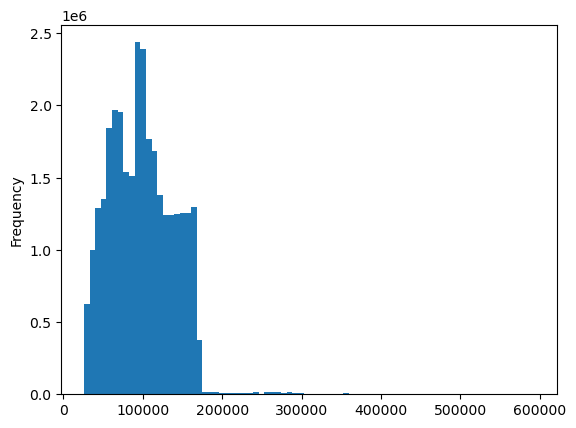

In [49]:
#Histogram of Income Frequency
df_final_high['income'].plot.hist(bins = 80)

In [50]:
#Creating an Income Profile; Use 67K becuase this is the bottom quartile value
df_final_high.loc[df_final_high['income'] < 67000, 'Income_Profile'] = 'Low Income'

C:\Users\Dallas\AppData\Local\Temp\ipykernel_1804\2159832236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high.loc[df_final_high['income'] < 67000, 'Income_Profile'] = 'Low Income'


In [51]:
#Using 128K as the upper bound because this is the third quartile
df_final_high.loc[(df_final_high['income'] >= 67000) & (df_final_high['income'] < 128000), 'Income_Profile'] = 'Medium Income'

In [52]:
#Using the upper bound as 200K because this is almost two standard deviations away from the third quartile
df_final_high.loc[(df_final_high['income'] >= 128000) & (df_final_high['income'] < 200000), 'Income_Profile'] = 'High Income'

In [53]:
df_final_high.loc[df_final['income'] >= 200000, 'Income_Profile'] = 'Very High Income'

In [54]:
df_final_high['Income_Profile'].value_counts(dropna = False)

Medium Income       15549969
Low Income           7661478
High Income          7498975
Very High Income      254142
Name: Income_Profile, dtype: int64

### 5c. Department Profile

In [55]:
#Import Departments Dataframe to create Department Dictionary
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [56]:
# Rename unnamed column to 'department_id'
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [57]:
#Display list of departments
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [58]:
#Create crosstab between user_id and department_id: to identify consumer choices
cross_dept_user = pd.crosstab(df_final_high['department_id'], df_final_high['user_id'], dropna = False)

In [59]:
#Assigning nutrition flags based on dietary choices into a dictionary
diet_dict = dict()
for user in cross_dept_user:
    workinglist = cross_dept_user[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        diet_dict[user] = 'Vegan'
    else:
        diet_dict[user] = 'Non-vegan'

In [60]:
#Assigning user flags to the diet list
diet_flag = []
for user in df_final_high['user_id']:
    diet_flag.append(diet_dict[user])

In [61]:
#Adding Diet flag to the df_final dataframe
df_final_high['Diet Profile'] = diet_flag

C:\Users\Dallas\AppData\Local\Temp\ipykernel_1804\1953270743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high['Diet Profile'] = diet_flag


In [62]:
#Checking frequency for new diet flag
df_final_high['Diet Profile'].value_counts(dropna = False)

Non-vegan    30654568
Vegan          309996
Name: Diet Profile, dtype: int64

In [63]:
#Assigning pet flags based on consumer choices into dictionary
pet_dict = dict()
for user in cross_dept_user:
    workinglist = cross_dept_user[user].tolist()
    if workinglist[7] == 0 :      
        pet_dict[user] = 'Non Pet-Owner'
    else:
        pet_dict[user] = 'Pet-Owner'

In [64]:
#Assiging user flags to the pet list
pet_flag = []
for user in df_final_high['user_id']:
    pet_flag.append(pet_dict[user])

In [65]:
#Adding Pet flag to the df_final dataframe
df_final_high['Pet Profile'] = pet_flag

C:\Users\Dallas\AppData\Local\Temp\ipykernel_1804\3759796547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high['Pet Profile'] = pet_flag


In [66]:
#Checking frequency for new pet flag
df_final_high['Pet Profile'].value_counts(dropna = False)

Non Pet-Owner    27513213
Pet-Owner         3451351
Name: Pet Profile, dtype: int64

### 5d. Family Status Profile

In [67]:
#Checking the frequency Distribution for Marital Status
df_final_high['fam_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [68]:
#Checking the frequency Distribution for number of dependants
df_final_high['n_dependants'].value_counts(dropna = False)

3    7772516
0    7739681
2    7733261
1    7719106
Name: n_dependants, dtype: int64

In [69]:
#Creating a crosstab between n_dependants and fam_status
cross_fam_dep = pd.crosstab(df_final_high['fam_status'], df_final_high['n_dependants'], dropna = False)

In [70]:
cross_fam_dep

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [71]:
#Creating "Family Profile" column; NOTE: Dependants is not defined to be solely children
df_final_high.loc[(df_final_high['fam_status'] == 'married') & (df_final_high['n_dependants'] == 1), 'Family Profile'] = 'Married w/o dependants'

C:\Users\Dallas\AppData\Local\Temp\ipykernel_1804\1845450187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high.loc[(df_final_high['fam_status'] == 'married') & (df_final_high['n_dependants'] == 1), 'Family Profile'] = 'Married w/o dependants'


In [72]:
df_final_high.loc[(df_final_high['fam_status'] == 'married') & (df_final_high['n_dependants'] >= 2), 'Family Profile'] = 'Married w/ dependants'

In [73]:
df_final_high.loc[(df_final_high['fam_status'] != 'married') & (df_final_high['n_dependants'] == 0), 'Family Profile'] = 'Single w/o dependants'

In [74]:
df_final_high.loc[(df_final_high['fam_status'] != 'married') & (df_final_high['n_dependants'] >= 1), 'Family Profile'] = 'Single w/ dependants'

In [75]:
#Checking the frequency for Family Profile
df_final_high['Family Profile'].value_counts(dropna = False)

Married w/ dependants     14532650
Single w/o dependants      7739681
Married w/o dependants     7211061
Single w/ dependants       1481172
Name: Family Profile, dtype: int64

### Question 6. Create an appropriate visualization to show the distribution of profiles

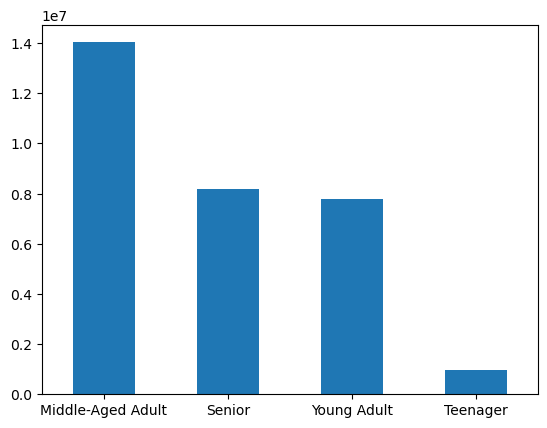

In [76]:
#Age Profile Bar Chart
age_prof = df_final_high['Age_Profile'].value_counts().plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

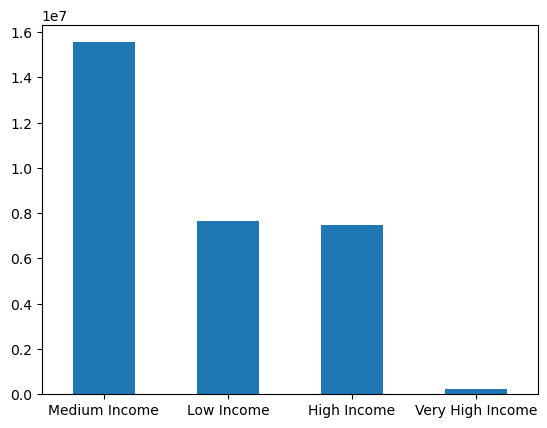

In [77]:
#Income Profile Bar Chart
income_prof = df_final_high['Income_Profile'].value_counts().plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

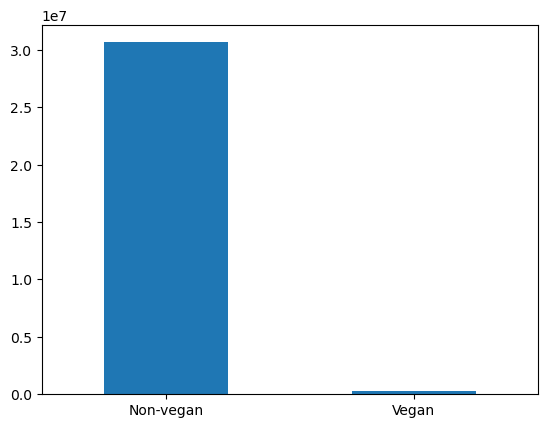

In [78]:
#Diet Profile Bar Chart
diet_prof = df_final_high['Diet Profile'].value_counts().plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

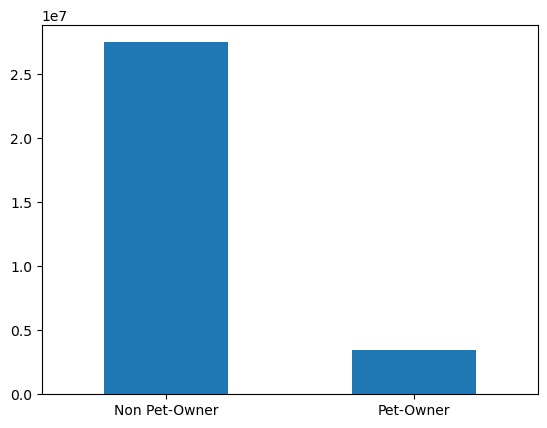

In [79]:
#Pet Profile Bar Chart
pet_prof = df_final_high['Pet Profile'].value_counts().plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

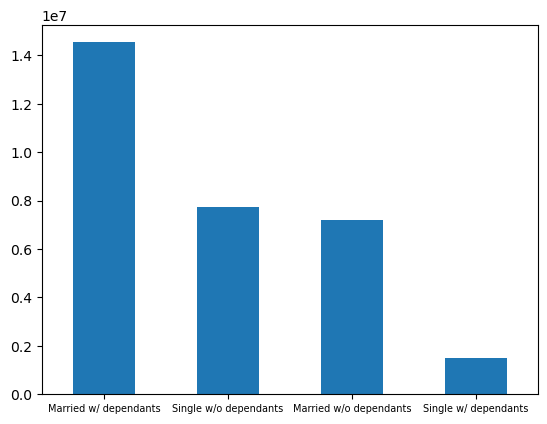

In [80]:
#Family Profile Bar Chart
family_prof = df_final_high['Family Profile'].value_counts().plot.bar()
plt.xticks(rotation = 'horizontal', fontsize = '7')
plt.show()

In [81]:
#Exporting all visualizations
age_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

In [82]:
income_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

In [83]:
diet_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_profile_bar.png'))

In [84]:
pet_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_profile_bar.png'))

In [85]:
family_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

### Question 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [86]:
#Age Profile Statistics
df_final_high.groupby('Age_Profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                    mean   max  min      mean   max  min
Age_Profile                                                             
Middle-Aged Adult              10.809459  30.0  0.0  7.790162  25.0  1.0
Senior                         10.791788  30.0  0.0  7.795896  25.0  1.0
Teenager                       10.841769  30.0  0.0  7.805739  25.0  1.0
Young Adult                    10.827405  30.0  0.0  7.780620  25.0  1.0

In [87]:
#Income Profile Statistics
df_final_high.groupby('Income_Profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                   mean   max  min      mean   max  min
Income_Profile                                                         
High Income                   10.779746  30.0  0.0  7.955637  25.0  1.0
Low Income                    10.966095  30.0  0.0  7.293608  25.0  1.0
Medium Income                 10.760295  30.0  0.0  7.955329  25.0  1.0
Very High Income              10.093070  30.0  0.0  7.724014  25.0  1.0

In [88]:
#Diet Profile Statistics
df_final_high.groupby('Diet Profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                               mean   max  min      mean   max  min
Diet Profile                                                       
Non-vegan                 10.781076  30.0  0.0  7.798198  25.0  1.0
Vegan                     13.800485  30.0  0.0  6.957126  20.0  1.0

In [89]:
#Pet Profile Statistics
df_final_high.groupby('Pet Profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                mean   max  min      mean   max  min
Pet Profile                                                         
Non Pet-Owner              10.889796  30.0  0.0  7.787214  25.0  1.0
Pet-Owner                  10.182021  30.0  0.0  7.810213  25.0  1.0

In [90]:
#Family Profile Statistics
df_final_high.groupby('Family Profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                         mean   max  min      mean   max  min
Family Profile                                                               
Married w/ dependants               10.823959  30.0  0.0  7.786780  25.0  1.0
Married w/o dependants              10.814660  30.0  0.0  7.794788  25.0  1.0
Single w/ dependants                10.750995  30.0  0.0  7.799897  25.0  1.0
Single w/o dependants               10.791951  30.0  0.0  7.788800  25.0  1.0

### Question 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

### 8a. Customer Profiles by Region

### 8a.i. Age

#### Not including dropna = False instruction as we have no missing values;  We are normalizing the columns to show what each region is made up of based on individual percentages by profile

In [91]:
#Create cross-tab between Age Profile and Region 
cross_age_region = pd.crosstab(df_final_high['Age_Profile'], df_final_high['Region'])

In [92]:
cross_age_region

Region,Midwest,Northeast,South,West
Age_Profile,,,,
Middle-Aged Adult,3339056,2428404,4652267,3610488
Senior,1904046,1484807,2708461,2098230
Teenager,216918,175766,329011,252839
Young Adult,1801493,1375708,2621400,1965670


### 8a.ii. Income

In [93]:
#Create cross-tab between Income Profile and Region 
cross_income_region = pd.crosstab(df_final_high['Income_Profile'], df_final_high['Region'])

In [94]:
cross_income_region

Region,Midwest,Northeast,South,West
Income_Profile,,,,
High Income,1779798,1334003,2470038,1915136
Low Income,1770874,1354113,2567492,1968999
Medium Income,3646748,2736463,5190163,3976595
Very High Income,64093,40106,83446,66497


### 8a.iii. Diet

In [95]:
#Create cross-tab between Diet Profile and Region 
cross_diet_region = pd.crosstab(df_final_high['Diet Profile'], df_final_high['Region'])

In [96]:
cross_diet_region

Region,Midwest,Northeast,South,West
Diet Profile,,,,
Non-vegan,7188577,5409970,10210023,7845998
Vegan,72936,54715,101116,81229


### 8a.iv. Pet Ownership

In [97]:
#Create cross-tab between Diet Profile and Region 
cross_pet_region = pd.crosstab(df_final_high['Pet Profile'], df_final_high['Region'])

In [98]:
cross_pet_region

Region,Midwest,Northeast,South,West
Pet Profile,,,,
Non Pet-Owner,6433992,4866501,9193489,7019231
Pet-Owner,827521,598184,1117650,907996


### 8a.v. Family

In [99]:
#Create cross-tab between Diet Profile and Region 
cross_family_region = pd.crosstab(df_final_high['Family Profile'], df_final_high['Region'])

In [100]:
cross_family_region

Region,Midwest,Northeast,South,West
Family Profile,,,,
Married w/ dependants,3367591,2564228,4854839,3745992
Married w/o dependants,1719671,1289545,2368910,1832935
Single w/ dependants,351435,256430,505457,367850
Single w/o dependants,1822816,1354482,2581933,1980450


### 8b. Customer Profiles by Department

### 8b.i. Age

#### Same as above, although this time we will make the index normalized to obtain values for each row

In [101]:
#Extend the display to show all department columns
pd.options.display.max_columns = None

In [102]:
#Create cross-tab between Age Profile and Department 
cross_age_dept = pd.crosstab(df_final_high['Age_Profile'], df_final_high['department_id'])

In [103]:
cross_age_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Age_Profile,,,,,,,,,,,,,,,,,,,,,
Middle-Aged Adult,960444,15519,507800,4115775,65549,115879,1170491,41517,372239,14882,194554,304239,807475,304137,457386,2337584,317274,190723,1252869,454772,29107
Senior,564250,8946,295997,2408104,36693,67199,684020,25115,217316,8945,111052,181150,472383,175296,267509,1368072,186630,106204,728549,265199,16915
Teenager,66967,1145,34465,283695,5892,8345,79777,2988,26640,1059,13837,22090,56130,21294,32002,163319,22831,13048,85612,31237,2161
Young Adult,530070,8801,282566,2271699,36493,64568,637613,23440,205941,8565,104863,167302,446717,170123,255177,1308207,173122,100417,699376,252626,16585


### 8b.ii. Income

In [104]:
#Create cross-tab between Income Profile and Department 
cross_income_dept = pd.crosstab(df_final_high['Income_Profile'], df_final_high['department_id'])

In [105]:
cross_income_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Income_Profile,,,,,,,,,,,,,,,,,,,,,
High Income,522161,8252,278203,2243870,34972,63409,594695,23092,206331,7523,102277,177006,441984,156565,257187,1271709,166085,103667,579900,244039,16048
Low Income,505256,8495,261763,2100660,36650,57089,737043,21593,177781,9320,106777,125796,413041,185892,219841,1215904,181595,82803,953000,245437,15742
Medium Income,1074462,17193,568258,4685350,66878,133456,1215502,46492,431141,16581,211215,365820,911804,321864,525957,2645262,340651,221818,1210554,507050,32661
Very High Income,19852,471,12604,49393,6127,2037,24661,1883,6883,27,4037,6159,15876,6529,9089,44307,11526,2104,22952,7308,317


### 8b.iii. Diet

In [106]:
#Create cross-tab between Diet Profile and Department 
cross_diet_dept = pd.crosstab(df_final_high['Diet Profile'], df_final_high['department_id'])

In [107]:
cross_diet_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Diet Profile,,,,,,,,,,,,,,,,,,,,,
Non-vegan,2104576,33664,1115693,8982269,134003,254813,2510580,92166,819681,32871,416233,674781,1769475,664259,1007336,5177182,680468,408710,2712973,998623,64212
Vegan,17155,747,5135,97004,10624,1178,61321,894,2455,580,8073,0,13230,6591,4738,0,19389,1682,53433,5211,556


### 8b.iv. Pet Ownership

In [108]:
#Create cross-tab between Pet Profile and Department 
cross_pet_dept = pd.crosstab(df_final_high['Pet Profile'], df_final_high['department_id'])

In [109]:
cross_pet_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Pet Profile,,,,,,,,,,,,,,,,,,,,,
Non Pet-Owner,1841935,29218,983073,8309659,118075,225074,2252549,0,721902,31331,348646,595228,1566867,596728,886208,4653047,565937,374825,2461225,894305,57381
Pet-Owner,279796,5193,137755,769614,26552,30917,319352,93060,100234,2120,75660,79553,215838,74122,125866,524135,133920,35567,305181,109529,7387


### 8b.v. Family

In [110]:
#Create cross-tab between Family Profile and Department 
cross_family_dept = pd.crosstab(df_final_high['Family Profile'], df_final_high['department_id'])

In [111]:
cross_family_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Family Profile,,,,,,,,,,,,,,,,,,,,,
Married w/ dependants,999057,15745,523567,4262296,66171,118700,1209634,42732,387173,15724,198871,318215,835734,313272,476452,2421459,330557,194848,1301249,470594,30600
Married w/o dependants,490333,8137,262182,2110997,33250,60436,597819,21388,191125,8094,99029,158344,417222,157948,236125,1211140,164593,92835,643409,231739,14916
Single w/ dependants,102993,1815,53684,430539,8379,12394,119107,5338,39542,1633,20201,32344,85845,33198,48477,250207,33349,19381,131310,48119,3317
Single w/o dependants,529348,8714,281395,2275441,36827,64461,645341,23602,204296,8000,106205,165878,443904,166432,251020,1294376,171358,103328,690438,253382,15935


## OBSERVATIONS: Generally speaking, the cross between the profiles and the regions do not tell us much.  The regions with more people tend to have proportionally more sales, whether by age, income, pet, dietary preferences or family profile.  The same holds true when comparing the profiles with departments.  With the South region housing the most people, they show the highest numbers in every profile while the Northeast has the fewest people and they house the lowest numbers.    

### Question 9. Produce suitable charts to illustrate your results and export them in your project folder

### Visualizations by Region

#### NOTE: Y-Axis is in Millions of customers

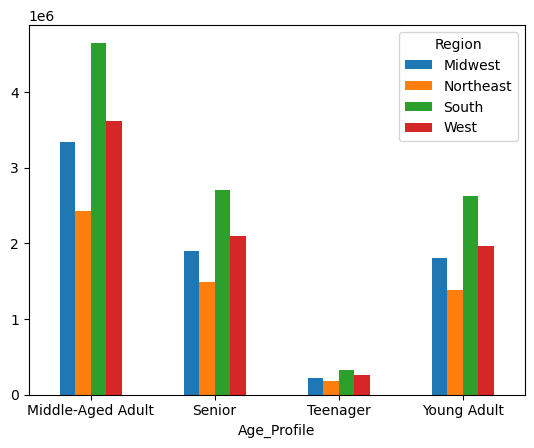

In [112]:
#Create a bar chart between the Age Profile and the Regions
bar_age_region = cross_age_region.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

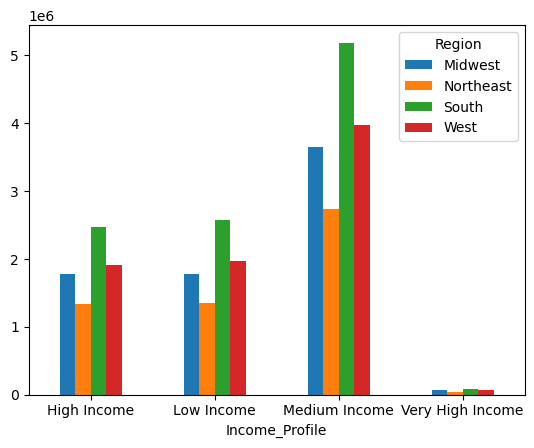

In [113]:
#Create a bar chart between the Income Profile and the Regions
bar_income_region = cross_income_region.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

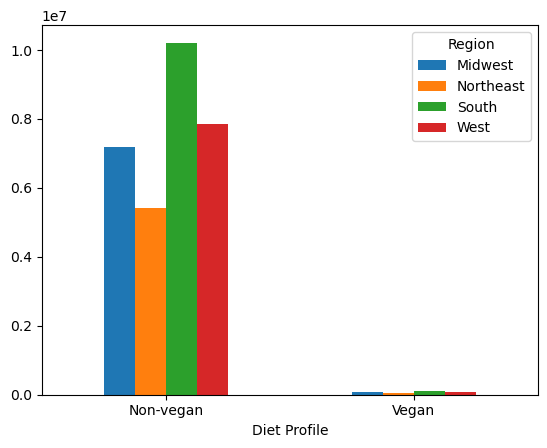

In [114]:
#Create a bar chart between Diet Profile and the Regions
bar_diet_region = cross_diet_region.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

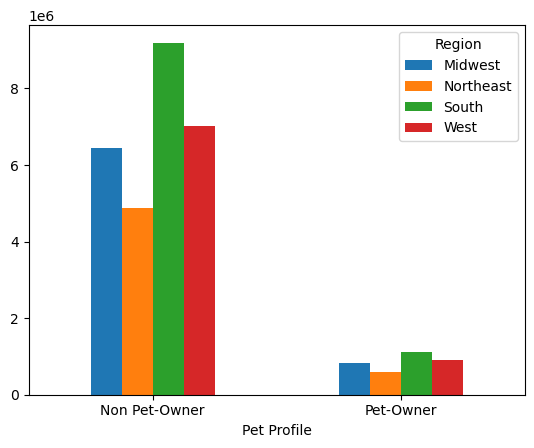

In [115]:
#Create a bar chart between Pet Profile and Region
bar_pet_region = cross_pet_region.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

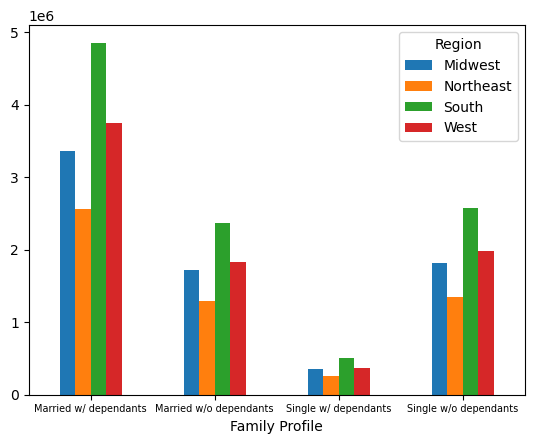

In [116]:
#Create a bar chart between Family Profile and Region
bar_family_region = cross_family_region.plot.bar()
plt.xticks(rotation = 'horizontal', fontsize = '7')
plt.show()

In [117]:
#Export the Age by Region Bar Chart
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))

In [118]:
#Export the Income by Region Bar Chart
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'))

In [119]:
#Export the Diet by Region Bar Chart
bar_diet_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'diet_region_bar.png'))

In [120]:
#Export the Pet by Region Bar Chart
bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_region_bar.png'))

In [121]:
#Export the Family by Region Bar Chart
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_region_bar.png'))

### Visualizations by Department

#### NOTE: Y-Axis represents millions of customers 

In [122]:
#Bring in the Department id list once more for ease
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [123]:
#Transpose the dataframe to put the department_id along the x-axis
cross_age_dept_T = cross_age_dept.T

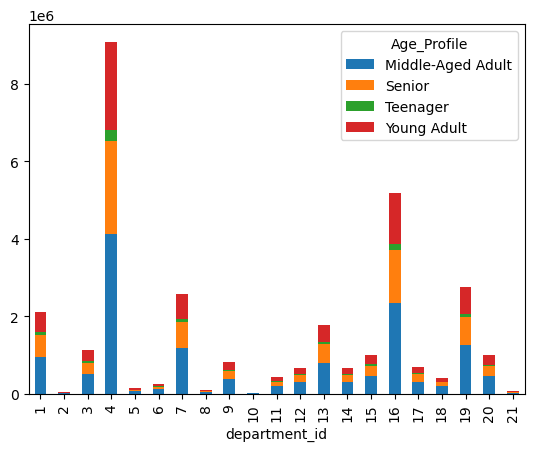

In [124]:
#Stacked Bar chart of the Age Profile to Department
bar_age_dept = cross_age_dept_T.plot.bar(stacked = True)

In [125]:
#Transpose the dataframe to put the department_id along the x-axis
cross_income_dept_T = cross_income_dept.T

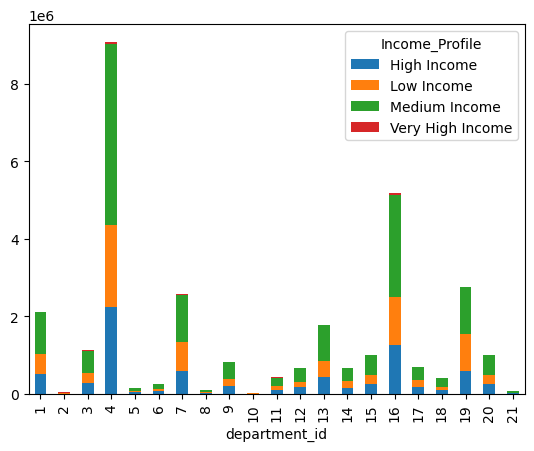

In [126]:
#Stacked Bar chart of the Income Profile to Department
bar_income_dept = cross_income_dept_T.plot.bar(stacked = True)

In [127]:
#Transpose the dataframe to put the department_id along the x-axis
cross_diet_dept_T = cross_diet_dept.T

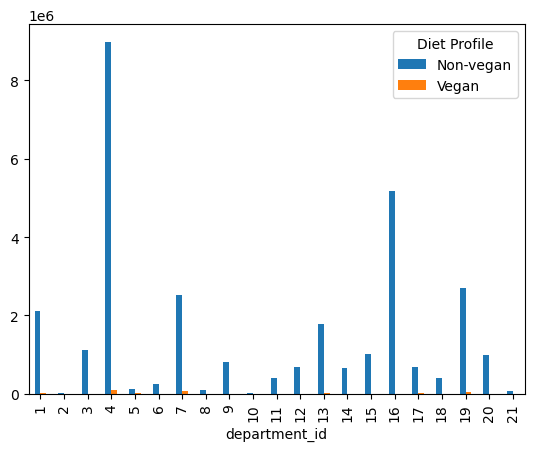

In [128]:
#Bar chart of the Diet Profile to Department
bar_diet_dept = cross_diet_dept_T.plot.bar()

In [129]:
#Transpose the dataframe to put the department_id along the x-axis
cross_pet_dept_T = cross_pet_dept.T

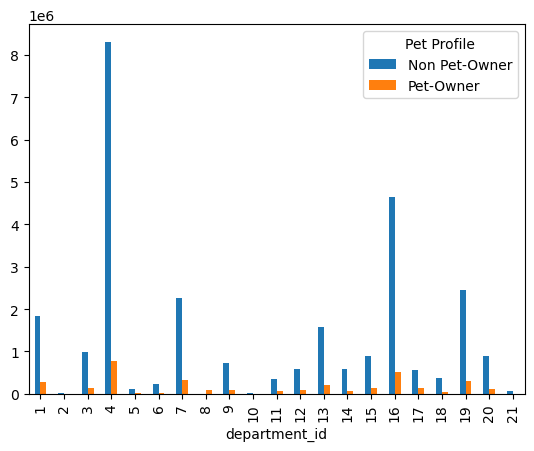

In [130]:
#Stacked Bar chart of the Pet Profile to Department
bar_pet_dept = cross_pet_dept_T.plot.bar()

In [131]:
#Transpose the dataframe to put the department_id along the x-axis
cross_family_dept_T = cross_family_dept.T

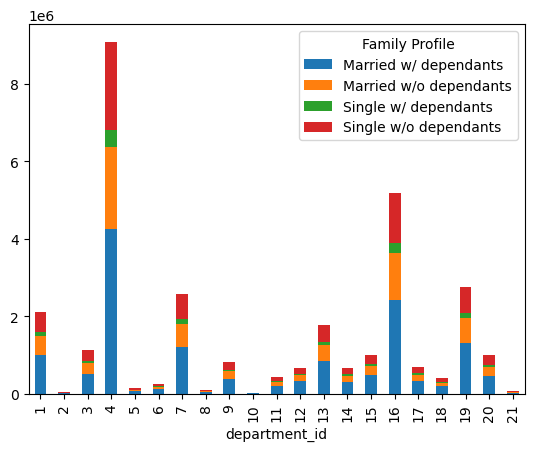

In [132]:
#Stacked Bar chart of the Family Profile to Department
bar_family_dept = cross_family_dept_T.plot.bar(stacked = True)

In [133]:
#Exporting all Profile by Department Visualizations
bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dept.png'))

In [134]:
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_dept.png'))

In [135]:
bar_diet_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_diet_dept.png'))

In [136]:
bar_pet_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_dept.png'))

In [137]:
bar_family_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_dept.png'))

# Supplementary Observations: Additional observations based on Questions from the Project Brief

#### What's the distribution among users in regards to their brand loyalty?

In [138]:
#Distribution of users between last order and Brand Loyalty
cross_days_loyalty = pd.crosstab(df_final_high['days_since_prior_order'], df_final_high['loyalty_flag'])

In [139]:
cross_days_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,239649,40517,157845
1.0,626159,43354,262177
2.0,973214,60662,417492
3.0,1185968,86136,587710
4.0,1202971,107496,747056
5.0,1074717,136069,886697
6.0,1090986,191359,1196418
7.0,1351314,291064,1775061
8.0,643383,185317,1065114


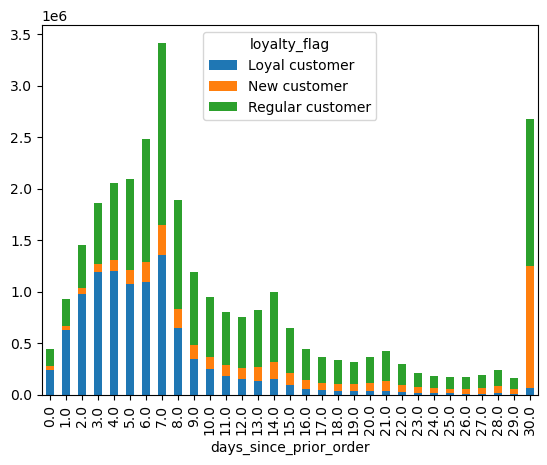

In [140]:
#Stacked Bar Chart to show distribution between days since last order and loyalty status
bar_days_loyalty = cross_days_loyalty.plot.bar(stacked = True)

In [141]:
#Distribution of users between order_hour_of_day and Brand Loyalty
cross_hod_loyalty = pd.crosstab(df_final_high['order_hour_of_day'], df_final_high['loyalty_flag'])

In [142]:
cross_hod_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208124,807091


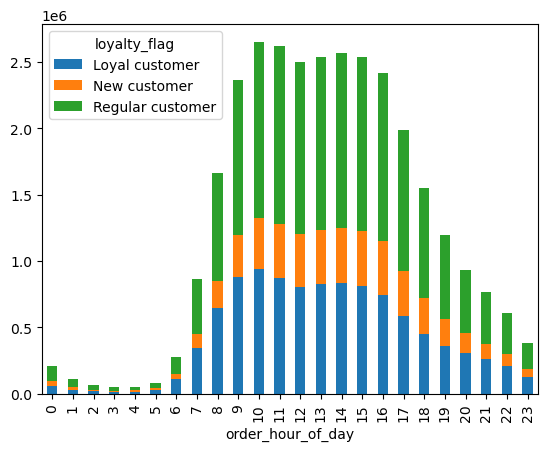

In [143]:
#Stacked bar chart to show distibution of most sales per hour of the day and loyalty status
bar_hod_loyalty = cross_hod_loyalty.plot.bar(stacked = True)

In [144]:
#Distribution of users between order_day_of_week and Brand Loyalty
cross_dow_loyalty = pd.crosstab(df_final_high['order_day_of_week'], df_final_high['loyalty_flag'])

In [145]:
cross_dow_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
order_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


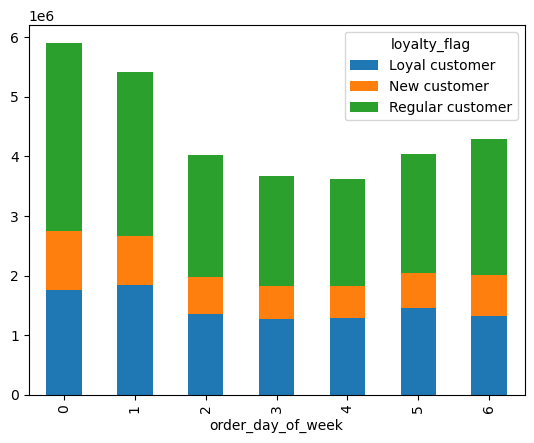

In [146]:
#Stacked bar chart to show distriution between most sales on the day of the week and loyalty status
bar_dow_loyalty = cross_dow_loyalty.plot.bar(stacked = True)

### Observations: Nothing significant to note between loyalty and the day of the week or hour of the day between loyalty flags.  The customers tend to shop normally regardless.  However, loyal customers, come back uch more frequently according to "days since prior order".  There is in fact a large spike on day 7, particularly for regular customers, which would suggest that they tend to make weekly visits.

In [147]:
#Exporting loyalty cross Visualizations
bar_days_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_days_loyal.png'))

In [148]:
bar_hod_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hod_loyal.png'))

In [149]:
bar_dow_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_loyal.png'))

#### Are their differences in ordering habits based on a customer's loyalty status?

In [150]:
#Crosstab between loyalty status and department ID
cross_dept_loyal = pd.crosstab(df_final_high['department_id'], df_final_high['loyalty_flag'])

In [151]:
cross_dept_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,372271,1140000
2,10715,5839,17857
3,379873,172104,568851
4,3147376,1336604,4595293
5,38723,28629,77275
6,78394,43841,133756
7,855017,396649,1320235
8,25469,15880,51711
9,242580,144836,434720


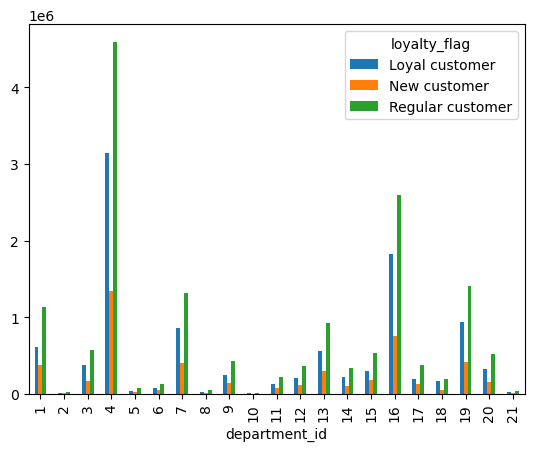

In [152]:
#Bar Cart between loyalty and department ID
bar_dept_loyal = cross_dept_loyal.plot.bar()

### Observations: The values are roughly consistent throughout and are proportionate to the number of people in each loyalty category for each department 

In [153]:
#Crosstab between loyalty status and department ID
cross_ord_freq_loyal = pd.crosstab(df_final_high['order_freq_flag'], df_final_high['loyalty_flag'])

In [154]:
cross_ord_freq_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
order_freq_flag,,,
Frequent customer,10279960,1293294,9631222
Non-Frequent customer,0,1983500,911475
Regular customer,4133,1526901,5334079


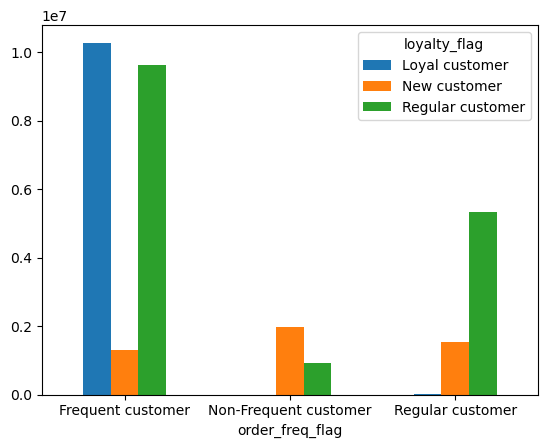

In [155]:
bar_ord_freq_loyal = cross_ord_freq_loyal.plot.bar()
plt.ylabel('')
plt.xticks(rotation = 'horizontal')
plt.show()

#### Are there differences in ordering habits based on a customer's region?

In [156]:
#Crosstab between loyalty status and region
cross_region_loyalty = pd.crosstab(df_final_high['Region'], df_final_high['loyalty_flag'])

In [157]:
cross_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


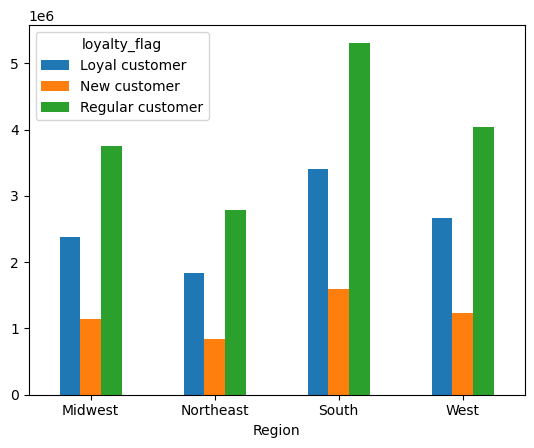

In [158]:
bar_region_loyalty = cross_region_loyalty.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

### Observations: The values are roughly consistent throughout and are proportionate to the number of people in each loyalty category for each region 

#### Is there a connection between age and family status in terms of ordering?

In [159]:
#Crosstab between age profile and family status
cross_age_family = pd.crosstab(df_final_high['Age_Profile'], df_final_high['Family Profile'])

In [160]:
cross_age_family

Family Profile,Married w/ dependants,Married w/o dependants,Single w/ dependants,Single w/o dependants
Age_Profile,,,,
Middle-Aged Adult,6969397,3520785,0,3540033
Senior,4144597,2028989,0,2021958
Teenager,0,0,749698,224836
Young Adult,3418656,1661287,731474,1952854


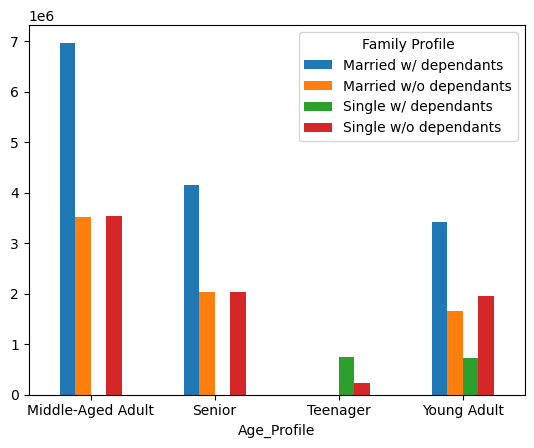

In [161]:
#Bar Chart showing cross between age and family status; Numbers in the y-axis are millions
bar_age_family = cross_age_family.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [162]:
#Crosstab between Age Profile and days since prior order
cross_days_age = pd.crosstab(df_final_high['days_since_prior_order'], df_final_high['Age_Profile'])

In [163]:
cross_days_age

Age_Profile,Middle-Aged Adult,Senior,Teenager,Young Adult
days_since_prior_order,,,,
0.0,201311,115359,14755,106586
1.0,423913,246229,30323,231225
2.0,663180,383565,45098,359525
3.0,841349,495868,59088,463509
4.0,931715,549913,64975,510920
5.0,951161,557274,67411,521637
6.0,1122865,657440,77211,621247
7.0,1538765,909239,104419,865016
8.0,857485,497986,58777,479566


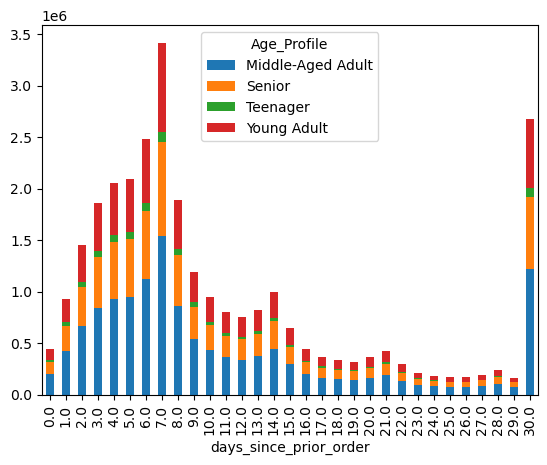

In [164]:
#Stacked bar chart between age profile and days since prior order
bar_days_age = cross_days_age.plot.bar(stacked = True)

In [165]:
#Crosstab between Family Profile and days_since_last_order
cross_days_family = pd.crosstab(df_final_high['days_since_prior_order'], df_final_high['Family Profile'])

In [166]:
cross_days_family

Family Profile,Married w/ dependants,Married w/o dependants,Single w/ dependants,Single w/o dependants
days_since_prior_order,,,,
0.0,203849,99520,21929,112713
1.0,432682,218642,44512,235854
2.0,682752,333201,70192,365223
3.0,877563,428899,89497,463855
4.0,963244,479675,98275,516329
5.0,981430,487187,102009,526857
6.0,1163220,579667,118777,617099
7.0,1600417,800622,164996,851404
8.0,887875,444179,91919,469841


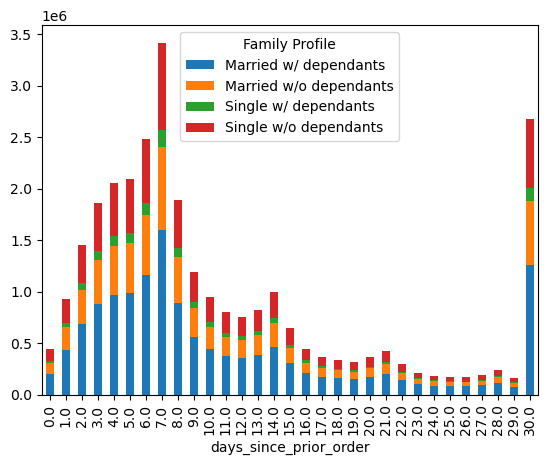

In [167]:
#Stacked bar chart between family profile and days since last order
bar_days_family = cross_days_family.plot.bar(stacked = True)

In [168]:
#Crosstab between Age Profile and spending flag
cross_price_age = pd.crosstab(df_final_high['spending_flag'], df_final_high['Region'])

In [169]:
cross_price_age

Region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,24085,15058,33246,25039
Low Spender,7237428,5449627,10277893,7902188


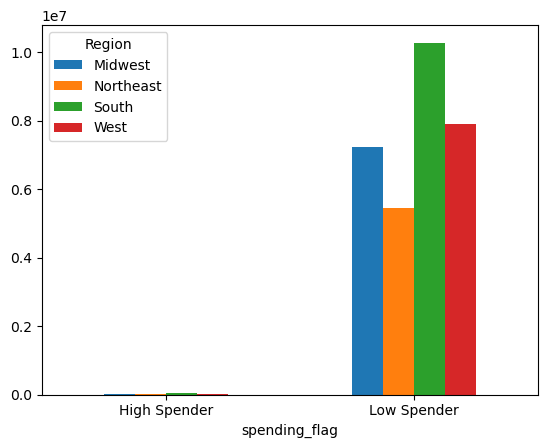

In [170]:
#Bar Chart for cross between age profile and spending flag 
bar_price_age = cross_price_age.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

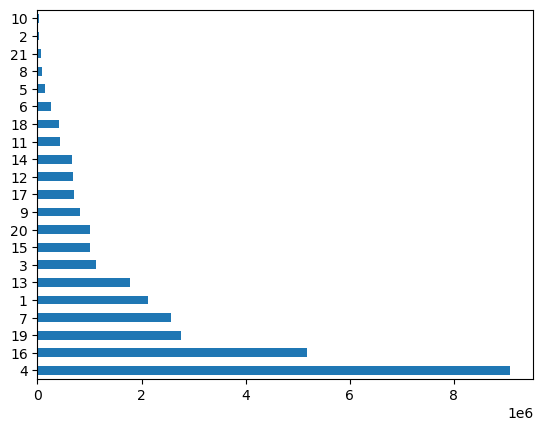

In [171]:
barh_dept_freq = df_final_high['department_id'].value_counts().plot.barh()

In [172]:
#Exporting supplementary visualizations
bar_days_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_days_loyalty.png'))

In [173]:
bar_hod_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hod_loyalty.png'))

In [174]:
bar_dow_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_loyalty.png'))

In [175]:
bar_dept_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_loyal.png'))

In [176]:
bar_ord_freq_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ord_freq_loyal.png'))

In [177]:
bar_region_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_loyal.png'))

In [178]:
bar_days_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_days_age.png'))

In [179]:
bar_days_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_days_family.png'))

In [180]:
bar_price_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spend_flag_age.png'))

In [181]:
barh_dept_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_dept_freq.png'))

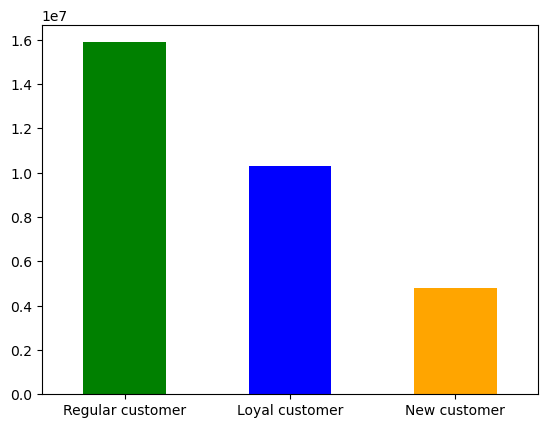

In [182]:
#Loyalty status frequency bar chart
df_loyal = df_final_high['loyalty_flag'].value_counts().plot.bar(color = ['green', 'blue', 'orange'])
plt.xticks(rotation = 'horizontal')
plt.show()

In [183]:
#Exporting Loyalty Frequency Bar Chart
df_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_color.png'))

In [184]:
#Crosstab between department_id and average price
cross_dept_avg = df_final_high.groupby('department_id').agg({'prices': ['mean']})

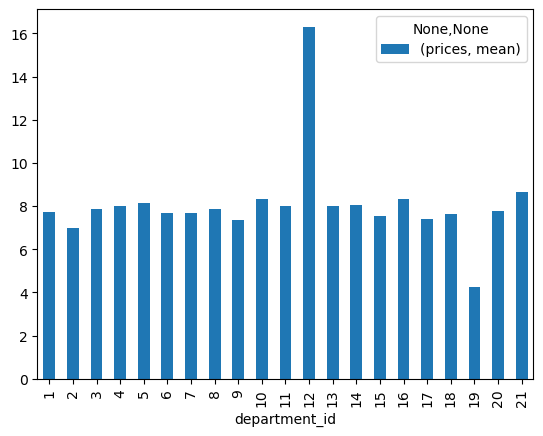

In [185]:
#Bar chart of department & average price
bar_dept_price = cross_dept_avg.plot.bar()

In [186]:
#Exporting crosstab bar chart with average price 
bar_dept_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_avgprice.png'))

In [187]:
#crosstab department_id and price_range 
cross_dept_price_range = pd.crosstab(index = df_final_high['department_id'], 
                                           columns = df_final_high['price_range_loc'], 
                                           normalize = 'index')

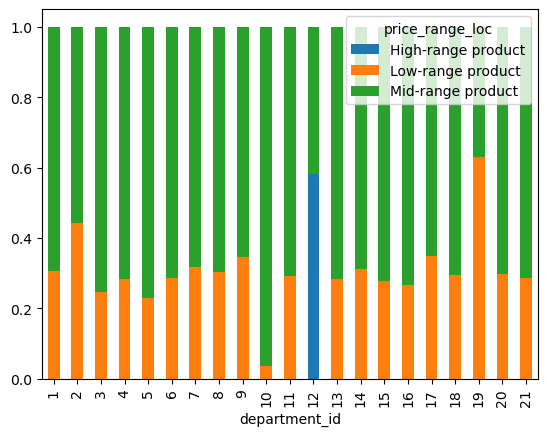

In [188]:
#Bar chart for crosstab between department_id and price_range
bar_dept_price_range = cross_dept_price_range.plot.bar(stacked = True)

In [189]:
#Exporting crosstab bar chart with average price 
bar_dept_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_price_range.png'))

In [190]:
#crosstab department_id and region
cross_dept_region = pd.crosstab(index = df_final_high['department_id'], 
                                           columns = df_final_high['Region'], 
                                           normalize = 'index')

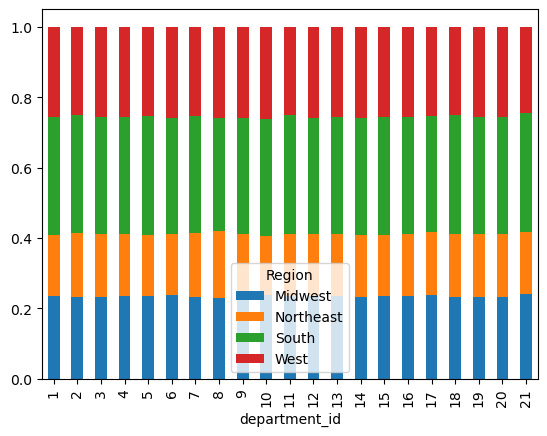

In [191]:
#Stacked bar Chart to to show difference in regions based on department
bar_dept_region = cross_dept_region.plot.bar(stacked = True)

In [192]:
#Export the Stacked Bar chart for region by department
bar_dept_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_region.png'))

### Crosstabs between Profiles

#### Age Profile Crosses

In [193]:
#Crosstab between Income Profile and Age Profile
cross_income_age = pd.crosstab(df_final_high['Income_Profile'], df_final_high['Age_Profile'])

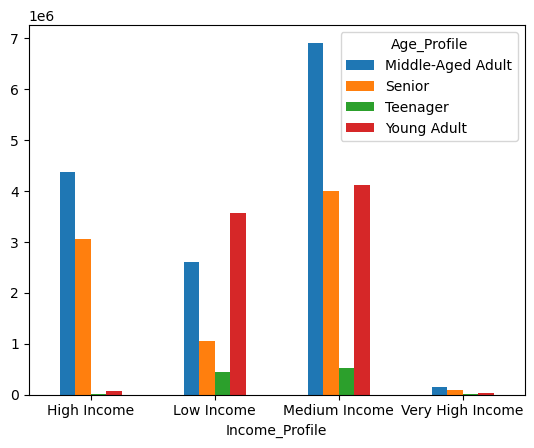

In [194]:
#Bar Chart of cross tab between Income PRofile and Age Profile
bar_income_age = cross_income_age.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [195]:
#Crosstab between Family Profile and Age Profile
cross_family_age = pd.crosstab(df_final_high['Family Profile'], df_final_high['Age_Profile'])

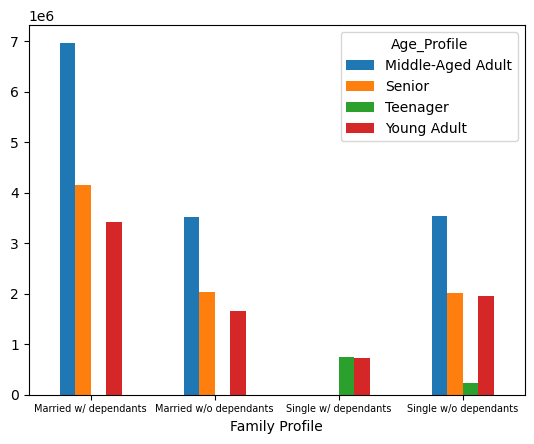

In [196]:
#Bar Chart of cross tab between Family Profile and Age Profile
bar_family_age = cross_family_age.plot.bar()
plt.xticks(rotation = 'horizontal', fontsize = '7')
plt.show()

In [197]:
#Crosstab between Pet Profile and Age Profile
cross_loyal_age = pd.crosstab(df_final_high['loyalty_flag'], df_final_high['Age_Profile'])

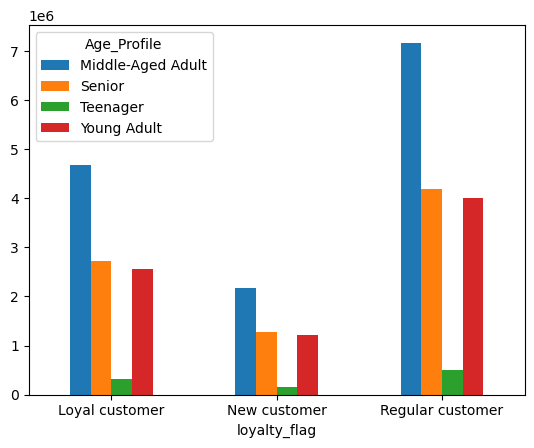

In [198]:
#Bar Chart of cross tab between Pet Profile and Age Profile
bar_loyal_age = cross_loyal_age.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [199]:
#Crosstab between Pet Profile and Age Profile
cross_order_age = pd.crosstab(df_final_high['order_freq_flag'], df_final_high['Age_Profile'])

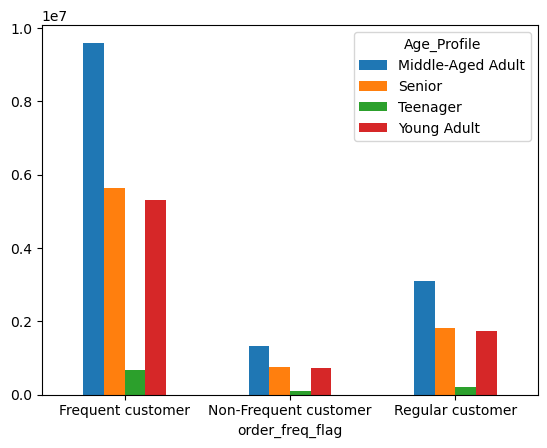

In [200]:
#Bar Chart of cross tab between Pet Profile and Age Profile
bar_order_age = cross_order_age.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [201]:
#Export the Crosstab Age Stacked Bar charts 
bar_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_age.png'))

In [202]:
bar_family_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_age.png'))

In [203]:
bar_loyal_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_age.png'))

In [204]:
bar_order_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_age.png'))

#### Income Profile Crosses

In [205]:
#Crosstab between Income Profile and Family Profile
cross_family_income = pd.crosstab(df_final_high['Family Profile'], df_final_high['Income_Profile'])

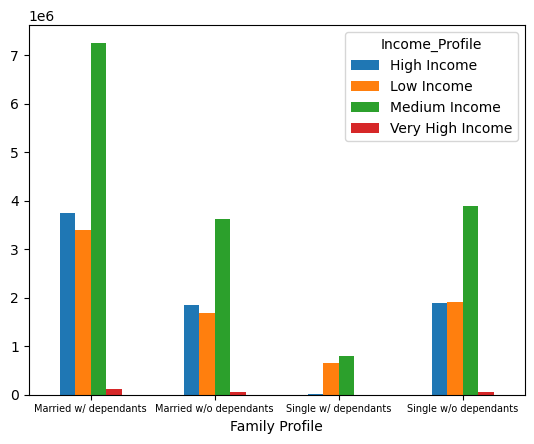

In [206]:
#Bar Chart of cross tab between Income Profile and Family Profile
bar_family_income = cross_family_income.plot.bar()
plt.xticks(rotation = 'horizontal', fontsize = '7')
plt.show()

In [207]:
#Crosstab between Income Profile and Family Profile
cross_age_income = pd.crosstab(df_final_high['Age_Profile'], df_final_high['Income_Profile'])

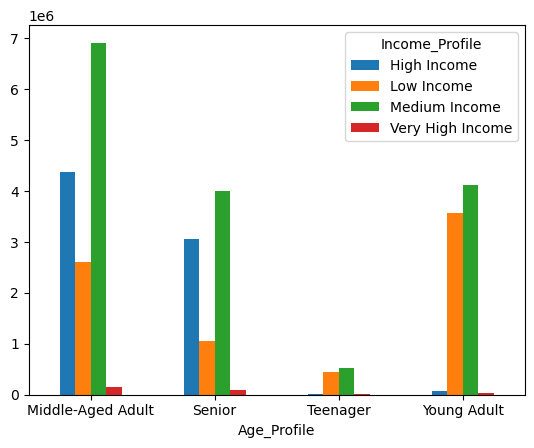

In [208]:
#Bar Chart of cross tab between Income Profile and Family Profile
bar_age_income = cross_age_income.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [209]:
#Crosstab between Income Profile and Family Profile
cross_loyal_income = pd.crosstab(df_final_high['loyalty_flag'], df_final_high['Income_Profile'])

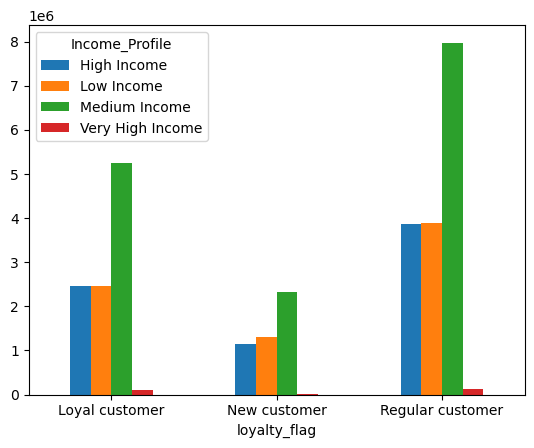

In [210]:
#Bar Chart of cross tab between Income Profile and Loyalty Flag
bar_loyal_income = cross_loyal_income.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [211]:
#Crosstab between Income Profile and Family Profile
cross_order_income = pd.crosstab(df_final_high['order_freq_flag'], df_final_high['Income_Profile'])

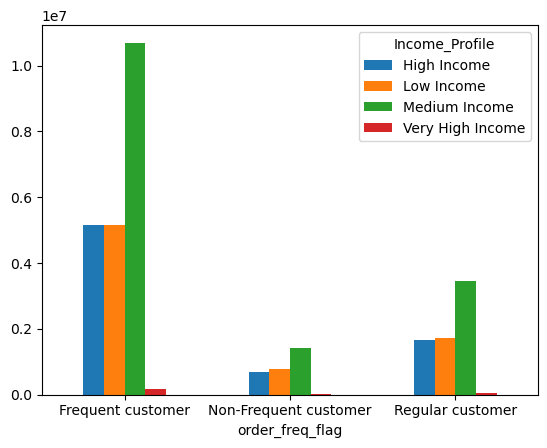

In [212]:
#Bar Chart of cross tab between Income Profile and Loyalty Flag
bar_order_income = cross_order_income.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [213]:
#Export the Crosstab Income Bar charts 
bar_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_income.png'))

In [214]:
bar_family_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_income.png'))

In [215]:
bar_loyal_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_income.png'))

In [216]:
bar_order_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_income.png'))

#### Family Profile Crosses

In [217]:
#Crosstab between Family Profile and Income Profile
cross_income_family = pd.crosstab(df_final_high['Income_Profile'], df_final_high['Family Profile'])

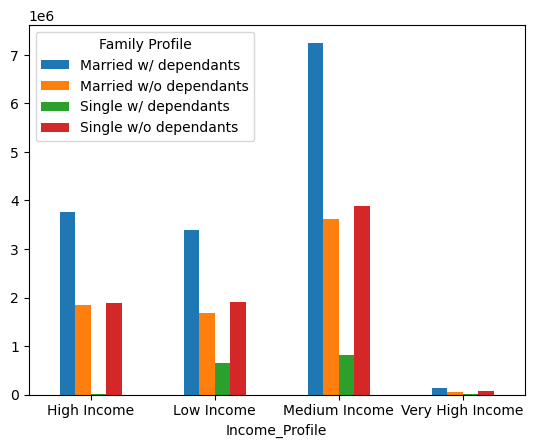

In [218]:
#Bar Chart of cross tab between Family Profile and Income Profile
bar_income_family = cross_income_family.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [219]:
#Crosstab between Family Profile and Age Profile
cross_age_family = pd.crosstab(df_final_high['Age_Profile'], df_final_high['Family Profile'])

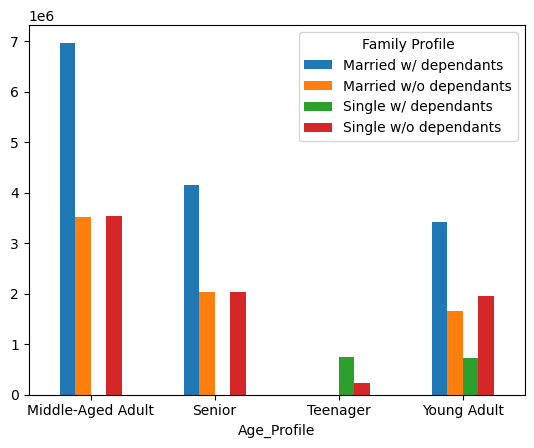

In [220]:
#Bar Chart of cross tab between Family Profile and Age Profile
bar_age_family = cross_age_family.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [221]:
#Crosstab between Family Profile and Loyalty Flag
cross_loyal_family = pd.crosstab(df_final_high['loyalty_flag'], df_final_high['Family Profile'])

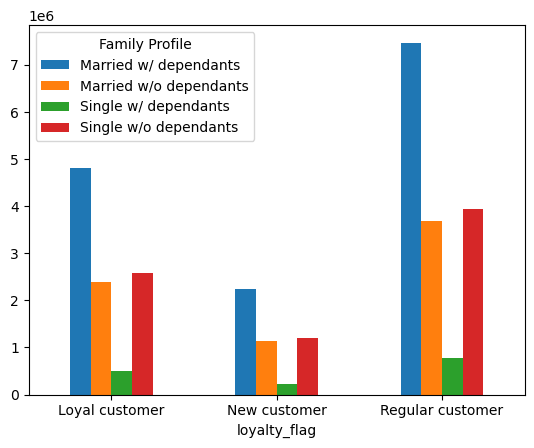

In [222]:
#Bar Chart of cross tab between Family Profile and Loyalty Flag
bar_loyal_family = cross_loyal_family.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [223]:
#Crosstab between Family Profile and order frequency
cross_order_family = pd.crosstab(df_final_high['order_freq_flag'], df_final_high['Family Profile'])

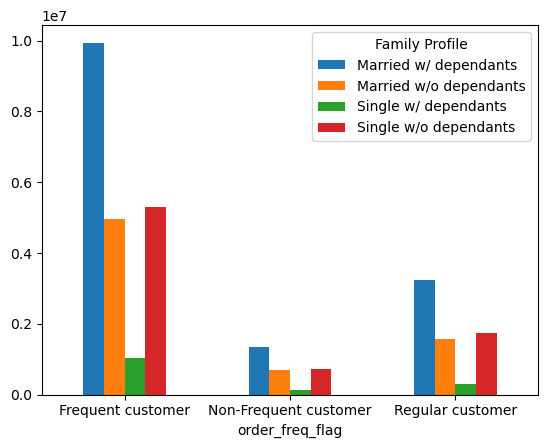

In [224]:
#Bar Chart of cross tab between Family Profile and Loyalty Flag
bar_order_family = cross_order_family.plot.bar()
plt.xticks(rotation = 'horizontal')
plt.show()

In [225]:
#Export the Crosstab Family Bar charts 
bar_income_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_family.png'))

In [226]:
bar_age_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_family.png'))

In [227]:
bar_loyal_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_family.png'))

In [228]:
bar_order_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_family.png'))

In [233]:
cross_dept_dow = pd.crosstab(df_final_high['department_id'], df_final_high['order_day_of_week'])

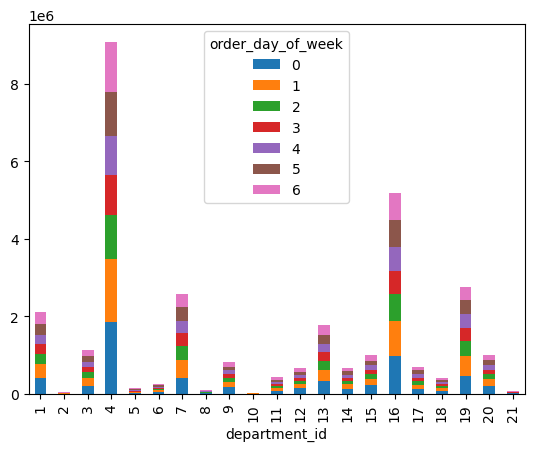

In [235]:
bar_dept_dow = cross_dept_dow.plot.bar(stacked = True)